Q1


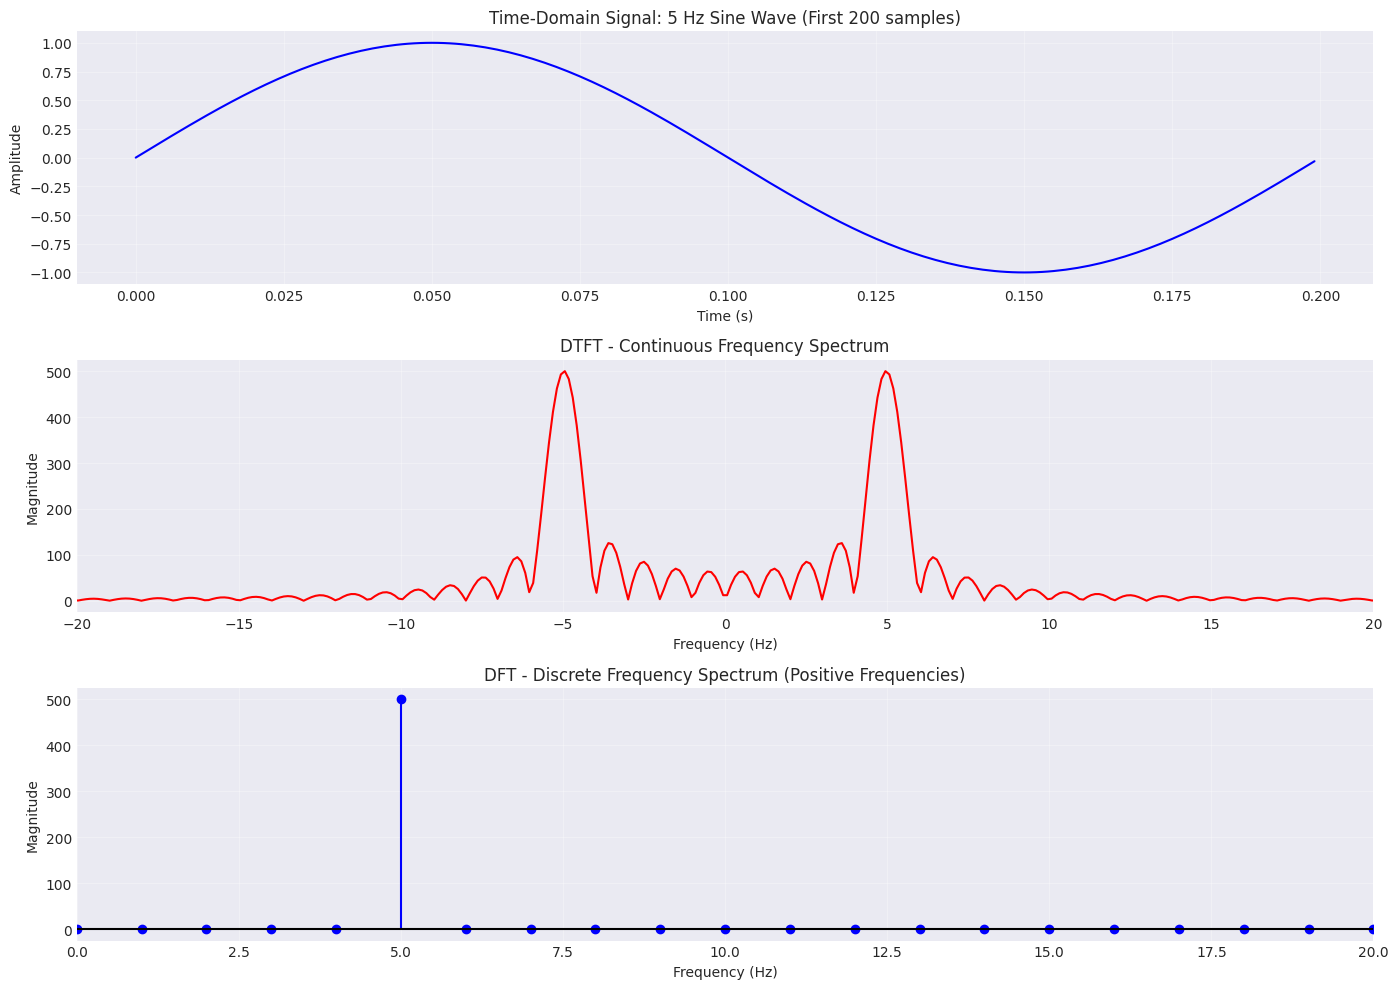

Signal Parameters:
Signal frequency: 5 Hz
Sampling frequency: 1000 Hz
Number of samples: 1000
Duration: 1 s

DFT frequency resolution: 1.00 Hz
DTFT evaluation points: 8192

DTFT Peak at: 4.94 Hz
DFT Peak at: 5.00 Hz


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a basic sinusoidal signal
f_signal = 5  # Signal frequency in Hz
fs = 1000  # Sampling frequency in Hz
duration = 1  # Duration in seconds

t = np.arange(0, duration, 1/fs)  # Time vector
x = np.sin(2 * np.pi * f_signal * t)  # Sinusoidal signal

# (b) Plot the time-domain waveform
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(t[:200], x[:200], 'b-', linewidth=1.5)  # Plot first 200 samples for clarity
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal: 5 Hz Sine Wave (First 200 samples)')
plt.grid(True, alpha=0.3)

# (c) Compute and plot DTFT (continuous frequency spectrum)
# DTFT is computed by evaluating at many frequency points
N_dtft = 8192  # Number of frequency points for smooth DTFT
w = np.linspace(-np.pi, np.pi, N_dtft)  # Normalized frequency from -π to π
f_dtft = w * fs / (2 * np.pi)  # Convert to Hz

# Compute DTFT using matrix multiplication
n = np.arange(len(x))
X_dtft = np.zeros(N_dtft, dtype=complex)
for k in range(N_dtft):
    X_dtft[k] = np.sum(x * np.exp(-1j * w[k] * n))

# Plot DTFT magnitude spectrum
plt.subplot(3, 1, 2)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT - Continuous Frequency Spectrum')
plt.xlim([-20, 20])
plt.grid(True, alpha=0.3)

# (d) Compute and plot DFT (discrete frequency spectrum)
N_dft = len(x)  # Number of samples
X_dft = np.fft.fft(x)  # Compute DFT using FFT algorithm
f_dft = np.fft.fftfreq(N_dft, 1/fs)  # Frequency bins

# Plot DFT magnitude spectrum
plt.subplot(3, 1, 3)
# Plot only positive frequencies for clarity
positive_freq_idx = f_dft >= 0
plt.stem(f_dft[positive_freq_idx], np.abs(X_dft[positive_freq_idx]), 
         linefmt='b-', markerfmt='bo', basefmt='k-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT - Discrete Frequency Spectrum (Positive Frequencies)')
plt.xlim([0, 20])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key information
print("=" * 60)
print("Signal Parameters:")
print("=" * 60)
print(f"Signal frequency: {f_signal} Hz")
print(f"Sampling frequency: {fs} Hz")
print(f"Number of samples: {len(x)}")
print(f"Duration: {duration} s")
print(f"\nDFT frequency resolution: {fs/N_dft:.2f} Hz")
print(f"DTFT evaluation points: {N_dtft}")
print("=" * 60)

# Find peak frequencies
dtft_peak_idx = np.argmax(np.abs(X_dtft[N_dtft//2:]))
dtft_peak_freq = f_dtft[N_dtft//2 + dtft_peak_idx]

dft_peak_idx = np.argmax(np.abs(X_dft[:N_dft//2]))
dft_peak_freq = f_dft[dft_peak_idx]

print(f"\nDTFT Peak at: {dtft_peak_freq:.2f} Hz")
print(f"DFT Peak at: {dft_peak_freq:.2f} Hz")
print("=" * 60)

Q2


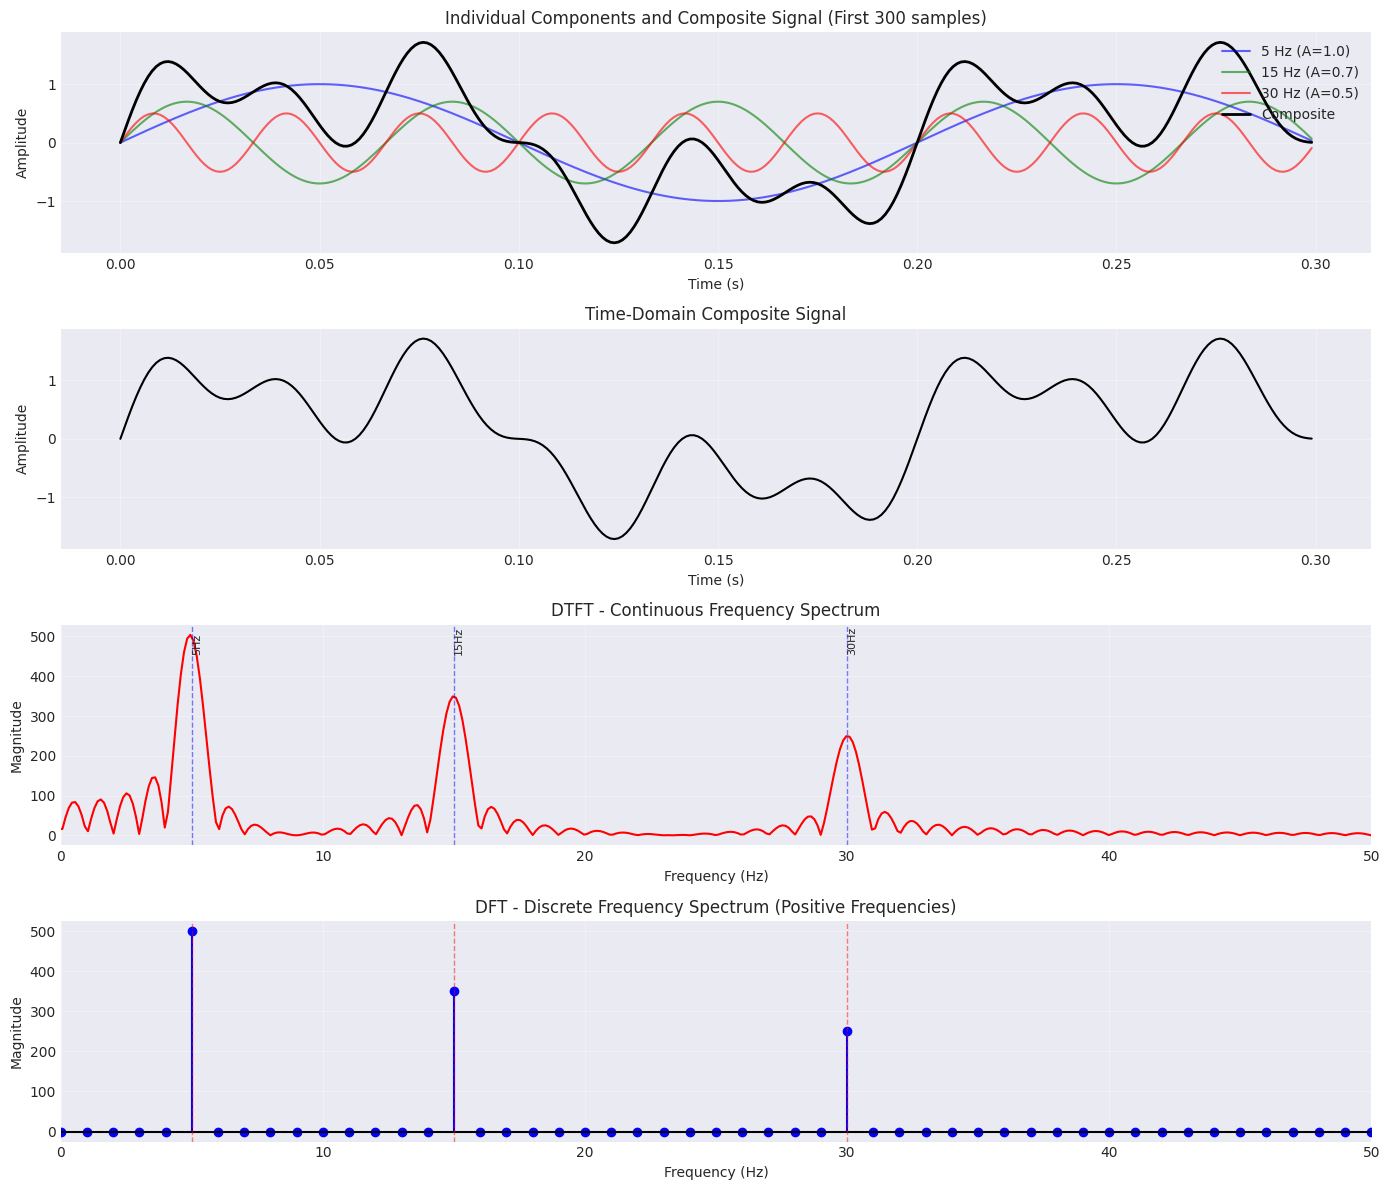

COMPOSITE SIGNAL PARAMETERS
Sampling frequency: 1000 Hz
Number of samples: 1000
Duration: 1 s
DFT frequency resolution: 1.00 Hz

Signal Components:
  Component 1: 5 Hz, Amplitude = 1.0
  Component 2: 15 Hz, Amplitude = 0.7
  Component 3: 30 Hz, Amplitude = 0.5

DFT Peak Analysis:
----------------------------------------------------------------------
Frequency (Hz)       Magnitude            Expected            
----------------------------------------------------------------------
5.00                 500.00               Component 1 (5 Hz, A=1.0)
15.00                350.00               Component 2 (15 Hz, A=0.7)
30.00                250.00               Component 3 (30 Hz, A=0.5)

Theoretical vs Computed Magnitudes:
----------------------------------------------------------------------
Component       Theoretical          Computed (DFT)      
----------------------------------------------------------------------
Component 1     500.00               500.00              
Component 2  

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a composite signal with multiple sinusoids
fs = 1000  # Sampling frequency in Hz
duration = 1  # Duration in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Define three sinusoidal components with different frequencies and amplitudes
f1, A1 = 5, 1.0    # 5 Hz, amplitude 1.0
f2, A2 = 15, 0.7   # 15 Hz, amplitude 0.7
f3, A3 = 30, 0.5   # 30 Hz, amplitude 0.5

# Individual components
signal1 = A1 * np.sin(2 * np.pi * f1 * t)
signal2 = A2 * np.sin(2 * np.pi * f2 * t)
signal3 = A3 * np.sin(2 * np.pi * f3 * t)

# Composite signal (sum of all components)
x = signal1 + signal2 + signal3

# (b) Plot the time-domain waveform
plt.figure(figsize=(14, 12))

# Plot individual components and composite signal
plt.subplot(4, 1, 1)
samples_to_plot = 300
plt.plot(t[:samples_to_plot], signal1[:samples_to_plot], 'b-', alpha=0.6, label=f'{f1} Hz (A={A1})')
plt.plot(t[:samples_to_plot], signal2[:samples_to_plot], 'g-', alpha=0.6, label=f'{f2} Hz (A={A2})')
plt.plot(t[:samples_to_plot], signal3[:samples_to_plot], 'r-', alpha=0.6, label=f'{f3} Hz (A={A3})')
plt.plot(t[:samples_to_plot], x[:samples_to_plot], 'k-', linewidth=2, label='Composite')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Individual Components and Composite Signal (First 300 samples)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.subplot(4, 1, 2)
plt.plot(t[:samples_to_plot], x[:samples_to_plot], 'k-', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Composite Signal')
plt.grid(True, alpha=0.3)

# (c) Compute and plot DTFT (continuous frequency spectrum)
N_dtft = 8192  # Number of frequency points for smooth DTFT
w = np.linspace(-np.pi, np.pi, N_dtft)  # Normalized frequency from -π to π
f_dtft = w * fs / (2 * np.pi)  # Convert to Hz

# Compute DTFT
n = np.arange(len(x))
X_dtft = np.zeros(N_dtft, dtype=complex)
for k in range(N_dtft):
    X_dtft[k] = np.sum(x * np.exp(-1j * w[k] * n))

# Plot DTFT magnitude spectrum
plt.subplot(4, 1, 3)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT - Continuous Frequency Spectrum')
plt.xlim([0, 50])
plt.grid(True, alpha=0.3)
# Mark the actual frequencies
for freq, amp in [(f1, A1), (f2, A2), (f3, A3)]:
    plt.axvline(x=freq, color='b', linestyle='--', alpha=0.5, linewidth=1)
    plt.text(freq, max(np.abs(X_dtft))*0.9, f'{freq}Hz', 
             rotation=90, verticalalignment='bottom', fontsize=8)

# (d) Compute and plot DFT (discrete frequency spectrum)
N_dft = len(x)  # Number of samples
X_dft = np.fft.fft(x)  # Compute DFT using FFT algorithm
f_dft = np.fft.fftfreq(N_dft, 1/fs)  # Frequency bins

# Plot DFT magnitude spectrum (positive frequencies only)
plt.subplot(4, 1, 4)
positive_freq_idx = f_dft >= 0
plt.stem(f_dft[positive_freq_idx], np.abs(X_dft[positive_freq_idx]), 
         linefmt='b-', markerfmt='bo', basefmt='k-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT - Discrete Frequency Spectrum (Positive Frequencies)')
plt.xlim([0, 50])
plt.grid(True, alpha=0.3)
# Mark the actual frequencies
for freq in [f1, f2, f3]:
    plt.axvline(x=freq, color='r', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# Print detailed information
print("=" * 70)
print("COMPOSITE SIGNAL PARAMETERS")
print("=" * 70)
print(f"Sampling frequency: {fs} Hz")
print(f"Number of samples: {len(x)}")
print(f"Duration: {duration} s")
print(f"DFT frequency resolution: {fs/N_dft:.2f} Hz")
print("\nSignal Components:")
print(f"  Component 1: {f1} Hz, Amplitude = {A1}")
print(f"  Component 2: {f2} Hz, Amplitude = {A2}")
print(f"  Component 3: {f3} Hz, Amplitude = {A3}")
print("=" * 70)

# Find and display peaks in DFT
print("\nDFT Peak Analysis:")
print("-" * 70)
# Get peaks above a threshold
threshold = np.max(np.abs(X_dft)) * 0.1
peak_indices = np.where(np.abs(X_dft[:N_dft//2]) > threshold)[0]
peak_freqs = f_dft[peak_indices]
peak_mags = np.abs(X_dft[peak_indices])

# Sort by magnitude
sorted_idx = np.argsort(peak_mags)[::-1]
print(f"{'Frequency (Hz)':<20} {'Magnitude':<20} {'Expected':<20}")
print("-" * 70)
for idx in sorted_idx[:3]:
    freq = peak_freqs[idx]
    mag = peak_mags[idx]
    # Check which component this corresponds to
    expected = ""
    if abs(freq - f1) < 1:
        expected = f"Component 1 ({f1} Hz, A={A1})"
    elif abs(freq - f2) < 1:
        expected = f"Component 2 ({f2} Hz, A={A2})"
    elif abs(freq - f3) < 1:
        expected = f"Component 3 ({f3} Hz, A={A3})"
    print(f"{freq:<20.2f} {mag:<20.2f} {expected:<20}")
print("=" * 70)

# Compute theoretical magnitudes (N/2 * Amplitude for real sinusoid)
print("\nTheoretical vs Computed Magnitudes:")
print("-" * 70)
print(f"{'Component':<15} {'Theoretical':<20} {'Computed (DFT)':<20}")
print("-" * 70)
for i, (freq, amp) in enumerate([(f1, A1), (f2, A2), (f3, A3)], 1):
    theoretical = N_dft / 2 * amp
    # Find closest DFT bin
    closest_idx = np.argmin(np.abs(f_dft[:N_dft//2] - freq))
    computed = np.abs(X_dft[closest_idx])
    print(f"Component {i:<5} {theoretical:<20.2f} {computed:<20.2f}")
print("=" * 70)

In [2]:
# Signal Analysis: Exponential Decay and Rectangular Pulse
# DTFT vs DFT Comparison

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)

QUESTION 3: EXPONENTIALLY DECAYING SIGNAL ANALYSIS

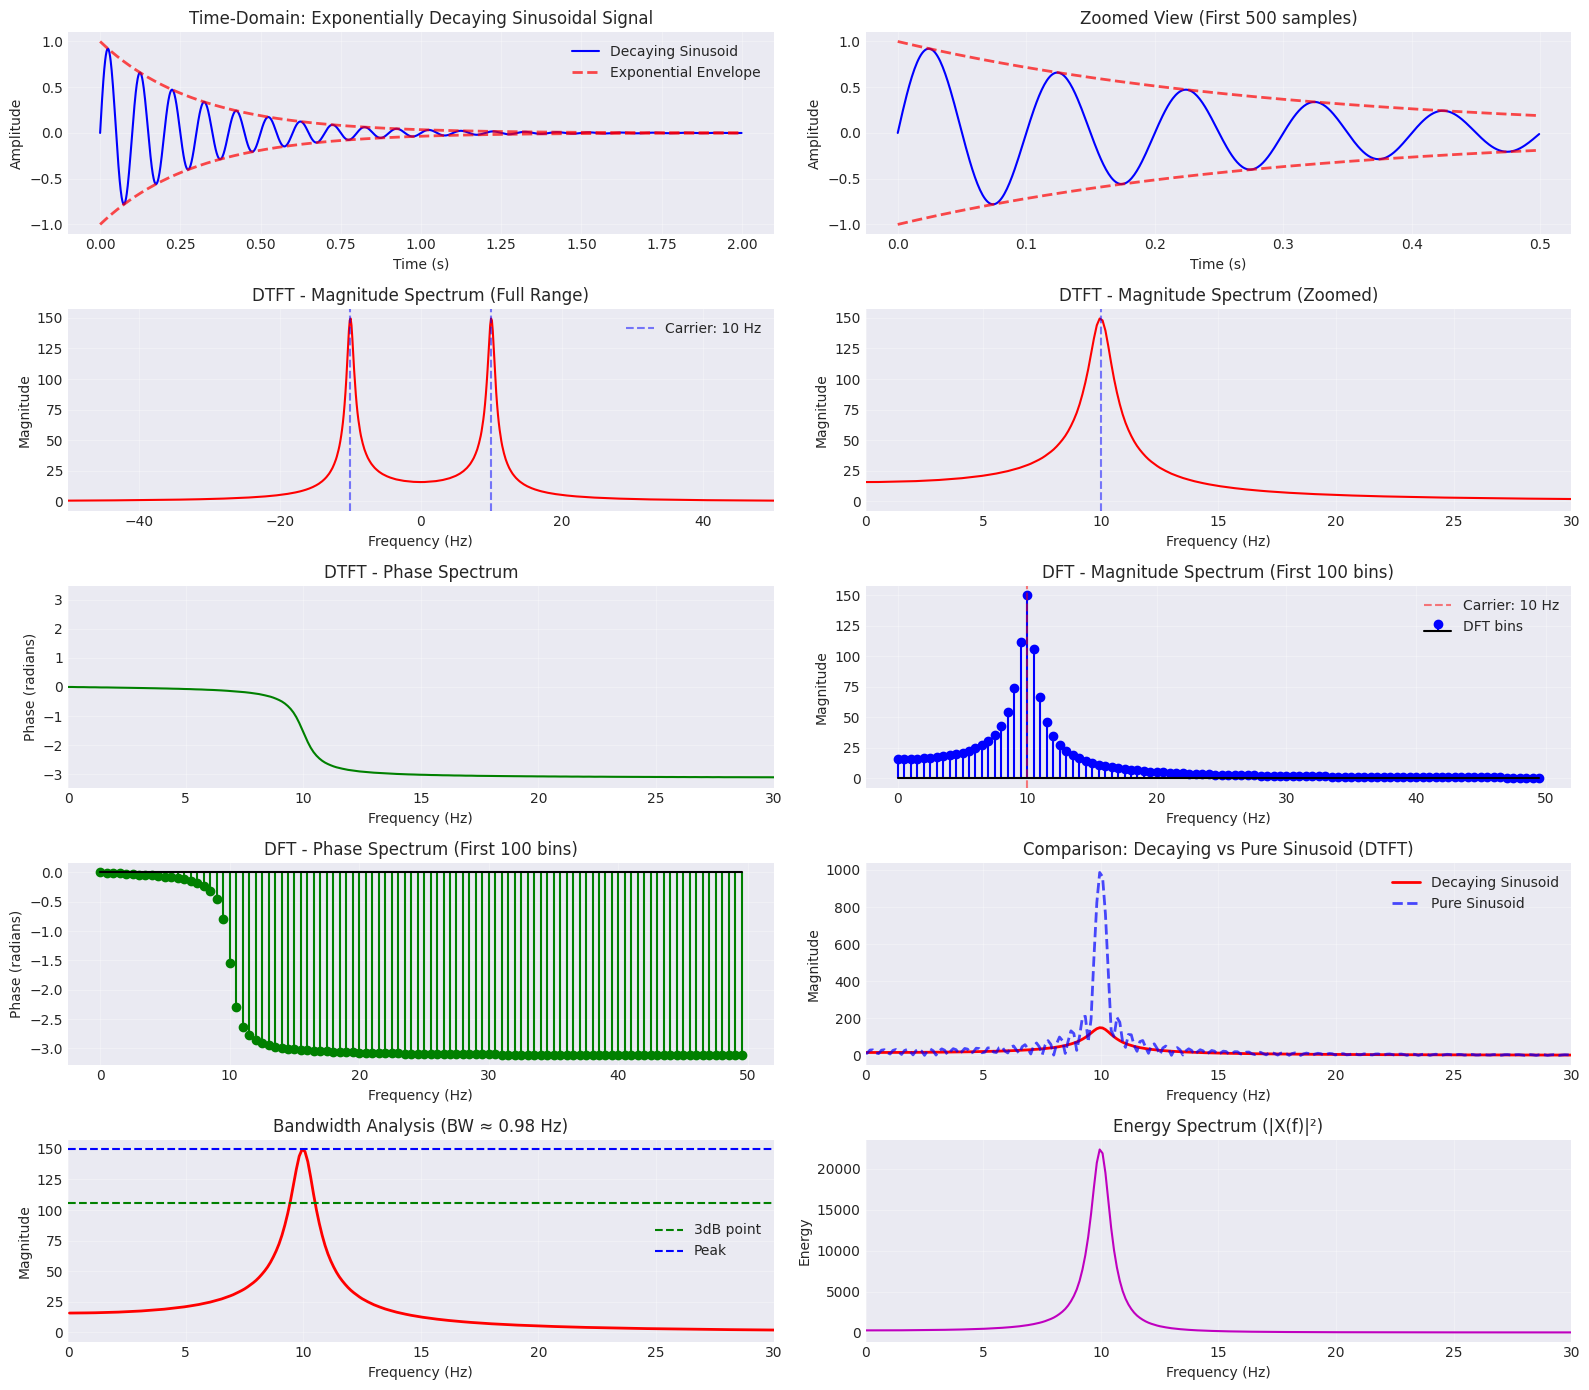

EXPONENTIALLY DECAYING SIGNAL ANALYSIS
Sampling frequency: 1000 Hz
Number of samples: 2000
Duration: 2 s
Time constant (τ): 0.3 s
Carrier frequency: 10 Hz
Initial amplitude: 1.0
DFT frequency resolution: 0.5000 Hz

(e) TIME-DOMAIN vs FREQUENCY-DOMAIN RELATIONSHIP ANALYSIS

1. SPECTRAL BROADENING:
--------------------------------------------------------------------------------
   • Pure sinusoid → Narrow peak (impulse-like)
   • Decaying sinusoid → Broadened spectrum around carrier frequency
   • Peak frequency: 9.95 Hz (close to carrier: 10 Hz)
   • 3dB Bandwidth: 0.98 Hz
   • Theoretical relationship: BW ≈ 1/(π·τ) = 1.06 Hz

2. TIME-FREQUENCY UNCERTAINTY:
--------------------------------------------------------------------------------
   • Effective signal duration: ~1.500 s (5τ)
   • Bandwidth: 0.98 Hz
   • Time-Bandwidth product: 1.47
   • Shorter time signals → Wider frequency spread
   • This demonstrates the time-frequency uncertainty principle

3. SPECTRAL CHARACTERISTICS:
-----

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate an exponentially decaying signal
fs = 1000  # Sampling frequency in Hz
duration = 2  # Duration in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Parameters for exponential decay
tau = 0.3  # Time constant (decay rate)
f_carrier = 10  # Carrier frequency in Hz
A = 1.0  # Initial amplitude

# Generate exponentially decaying sinusoid
x = A * np.exp(-t / tau) * np.sin(2 * np.pi * f_carrier * t)

# Also generate pure exponential decay for comparison
x_exp_only = A * np.exp(-t / tau)

# (b) Plot the time-domain waveform
plt.figure(figsize=(16, 14))

plt.subplot(5, 2, 1)
plt.plot(t, x, 'b-', linewidth=1.5, label='Decaying Sinusoid')
plt.plot(t, x_exp_only, 'r--', linewidth=2, alpha=0.7, label='Exponential Envelope')
plt.plot(t, -x_exp_only, 'r--', linewidth=2, alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain: Exponentially Decaying Sinusoidal Signal')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(5, 2, 2)
plt.plot(t[:500], x[:500], 'b-', linewidth=1.5)
plt.plot(t[:500], x_exp_only[:500], 'r--', linewidth=2, alpha=0.7)
plt.plot(t[:500], -x_exp_only[:500], 'r--', linewidth=2, alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed View (First 500 samples)')
plt.grid(True, alpha=0.3)

# (c) Compute and plot DTFT (continuous frequency spectrum)
N_dtft = 8192  # Number of frequency points for smooth DTFT
w = np.linspace(-np.pi, np.pi, N_dtft)  # Normalized frequency from -π to π
f_dtft = w * fs / (2 * np.pi)  # Convert to Hz

# Compute DTFT
n = np.arange(len(x))
X_dtft = np.zeros(N_dtft, dtype=complex)
for k in range(N_dtft):
    X_dtft[k] = np.sum(x * np.exp(-1j * w[k] * n))

# Plot DTFT magnitude spectrum
plt.subplot(5, 2, 3)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT - Magnitude Spectrum (Full Range)')
plt.xlim([-50, 50])
plt.axvline(x=f_carrier, color='b', linestyle='--', alpha=0.5, label=f'Carrier: {f_carrier} Hz')
plt.axvline(x=-f_carrier, color='b', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(5, 2, 4)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT - Magnitude Spectrum (Zoomed)')
plt.xlim([0, 30])
plt.axvline(x=f_carrier, color='b', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)

# Plot DTFT phase spectrum
plt.subplot(5, 2, 5)
plt.plot(f_dtft, np.angle(X_dtft), 'g-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('DTFT - Phase Spectrum')
plt.xlim([0, 30])
plt.grid(True, alpha=0.3)

# (d) Compute and plot DFT (discrete frequency spectrum)
N_dft = len(x)  # Number of samples
X_dft = np.fft.fft(x)  # Compute DFT using FFT algorithm
f_dft = np.fft.fftfreq(N_dft, 1/fs)  # Frequency bins

# Plot DFT magnitude spectrum
plt.subplot(5, 2, 6)
positive_freq_idx = f_dft >= 0
plt.stem(f_dft[positive_freq_idx][:100], np.abs(X_dft[positive_freq_idx][:100]), 
         linefmt='b-', markerfmt='bo', basefmt='k-', label='DFT bins')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT - Magnitude Spectrum (First 100 bins)')
plt.axvline(x=f_carrier, color='r', linestyle='--', alpha=0.5, label=f'Carrier: {f_carrier} Hz')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot DFT phase spectrum
plt.subplot(5, 2, 7)
plt.stem(f_dft[positive_freq_idx][:100], np.angle(X_dft[positive_freq_idx][:100]), 
         linefmt='g-', markerfmt='go', basefmt='k-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('DFT - Phase Spectrum (First 100 bins)')
plt.grid(True, alpha=0.3)

# (e) Analyze the relationship - Compare with pure sinusoid
# Generate a non-decaying sinusoid for comparison
x_pure = A * np.sin(2 * np.pi * f_carrier * t)
X_pure_dtft = np.zeros(N_dtft, dtype=complex)
for k in range(N_dtft):
    X_pure_dtft[k] = np.sum(x_pure * np.exp(-1j * w[k] * n))

plt.subplot(5, 2, 8)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=2, label='Decaying Sinusoid')
plt.plot(f_dtft, np.abs(X_pure_dtft), 'b--', linewidth=2, alpha=0.7, label='Pure Sinusoid')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Comparison: Decaying vs Pure Sinusoid (DTFT)')
plt.xlim([0, 30])
plt.legend()
plt.grid(True, alpha=0.3)

# Analyze bandwidth
plt.subplot(5, 2, 9)
# Get positive frequencies only
pos_idx = f_dtft >= 0
f_pos = f_dtft[pos_idx]
X_pos = np.abs(X_dtft[pos_idx])

# Find peak and 3dB bandwidth
peak_idx = np.argmax(X_pos)
peak_mag = X_pos[peak_idx]
peak_freq = f_pos[peak_idx]
mag_3db = peak_mag / np.sqrt(2)

# Find 3dB points
above_3db = X_pos > mag_3db
bandwidth_indices = np.where(above_3db)[0]
if len(bandwidth_indices) > 0:
    f_low = f_pos[bandwidth_indices[0]]
    f_high = f_pos[bandwidth_indices[-1]]
    bandwidth = f_high - f_low
else:
    bandwidth = 0

plt.plot(f_pos, X_pos, 'r-', linewidth=2)
plt.axhline(y=mag_3db, color='g', linestyle='--', label='3dB point')
plt.axhline(y=peak_mag, color='b', linestyle='--', label='Peak')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Bandwidth Analysis (BW ≈ {bandwidth:.2f} Hz)')
plt.xlim([0, 30])
plt.legend()
plt.grid(True, alpha=0.3)

# Energy spectrum
plt.subplot(5, 2, 10)
energy_spectrum = np.abs(X_dtft)**2
plt.plot(f_dtft, energy_spectrum, 'm-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy')
plt.title('Energy Spectrum (|X(f)|²)')
plt.xlim([0, 30])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=" * 80)
print("EXPONENTIALLY DECAYING SIGNAL ANALYSIS")
print("=" * 80)
print(f"Sampling frequency: {fs} Hz")
print(f"Number of samples: {len(x)}")
print(f"Duration: {duration} s")
print(f"Time constant (τ): {tau} s")
print(f"Carrier frequency: {f_carrier} Hz")
print(f"Initial amplitude: {A}")
print(f"DFT frequency resolution: {fs/N_dft:.4f} Hz")
print("=" * 80)

print("\n" + "=" * 80)
print("(e) TIME-DOMAIN vs FREQUENCY-DOMAIN RELATIONSHIP ANALYSIS")
print("=" * 80)

print("\n1. SPECTRAL BROADENING:")
print("-" * 80)
print(f"   • Pure sinusoid → Narrow peak (impulse-like)")
print(f"   • Decaying sinusoid → Broadened spectrum around carrier frequency")
print(f"   • Peak frequency: {peak_freq:.2f} Hz (close to carrier: {f_carrier} Hz)")
print(f"   • 3dB Bandwidth: {bandwidth:.2f} Hz")
print(f"   • Theoretical relationship: BW ≈ 1/(π·τ) = {1/(np.pi*tau):.2f} Hz")

print("\n2. TIME-FREQUENCY UNCERTAINTY:")
print("-" * 80)
duration_effective = 5 * tau  # Signal effectively dies after 5 time constants
print(f"   • Effective signal duration: ~{duration_effective:.3f} s (5τ)")
print(f"   • Bandwidth: {bandwidth:.2f} Hz")
print(f"   • Time-Bandwidth product: {duration_effective * bandwidth:.2f}")
print(f"   • Shorter time signals → Wider frequency spread")
print(f"   • This demonstrates the time-frequency uncertainty principle")

print("\n3. SPECTRAL CHARACTERISTICS:")
print("-" * 80)
# Calculate decay at specific time points
t_50 = tau * np.log(2)  # Time to 50% amplitude
t_99 = tau * np.log(100)  # Time to 1% amplitude
print(f"   • Time to 50% amplitude: {t_50:.3f} s")
print(f"   • Time to 1% amplitude: {t_99:.3f} s")
print(f"   • Faster decay (smaller τ) → Wider spectrum")
print(f"   • Slower decay (larger τ) → Narrower spectrum")

print("\n4. COMPARISON: DECAYING vs PURE SINUSOID:")
print("-" * 80)
# Find peak magnitudes
peak_decay = np.max(np.abs(X_dtft[pos_idx]))
peak_pure = np.max(np.abs(X_pure_dtft[pos_idx]))
print(f"   • Pure sinusoid peak magnitude: {peak_pure:.2f}")
print(f"   • Decaying sinusoid peak magnitude: {peak_decay:.2f}")
print(f"   • Ratio: {peak_decay/peak_pure:.3f}")
print(f"   • Pure sinusoid: All energy concentrated at single frequency")
print(f"   • Decaying sinusoid: Energy spread across frequency band")

print("\n5. ENERGY DISTRIBUTION:")
print("-" * 80)
total_energy_time = np.sum(x**2)
total_energy_freq = np.sum(np.abs(X_dft)**2) / N_dft
print(f"   • Total energy (time domain): {total_energy_time:.2f}")
print(f"   • Total energy (frequency domain): {total_energy_freq:.2f}")
print(f"   • Parseval's theorem verified: {np.isclose(total_energy_time, total_energy_freq)}")

print("\n6. PHYSICAL INTERPRETATION:")
print("-" * 80)
print(f"   • Exponential decay models:")
print(f"     - Damped oscillations (mechanical systems)")
print(f"     - RC circuit discharge")
print(f"     - Radioactive decay with oscillation")
print(f"     - Signal transmission through lossy medium")
print(f"   • The frequency spread represents the transient nature of the signal")
print(f"   • Non-stationary signals occupy broader frequency bands")

print("\n7. KEY INSIGHTS:")
print("-" * 80)
print(f"   ✓ Windowing/truncation in time → Spectral leakage in frequency")
print(f"   ✓ Finite duration signals → Continuous (not discrete) spectra")
print(f"   ✓ Sharp transitions in time → High frequency components")
print(f"   ✓ Slow variations in time → Low frequency components")
print(f"   ✓ Time localization ↔ Frequency spreading (complementary)")

print("=" * 80)

Q4 RECTANGULAR PULSE SIGNAL

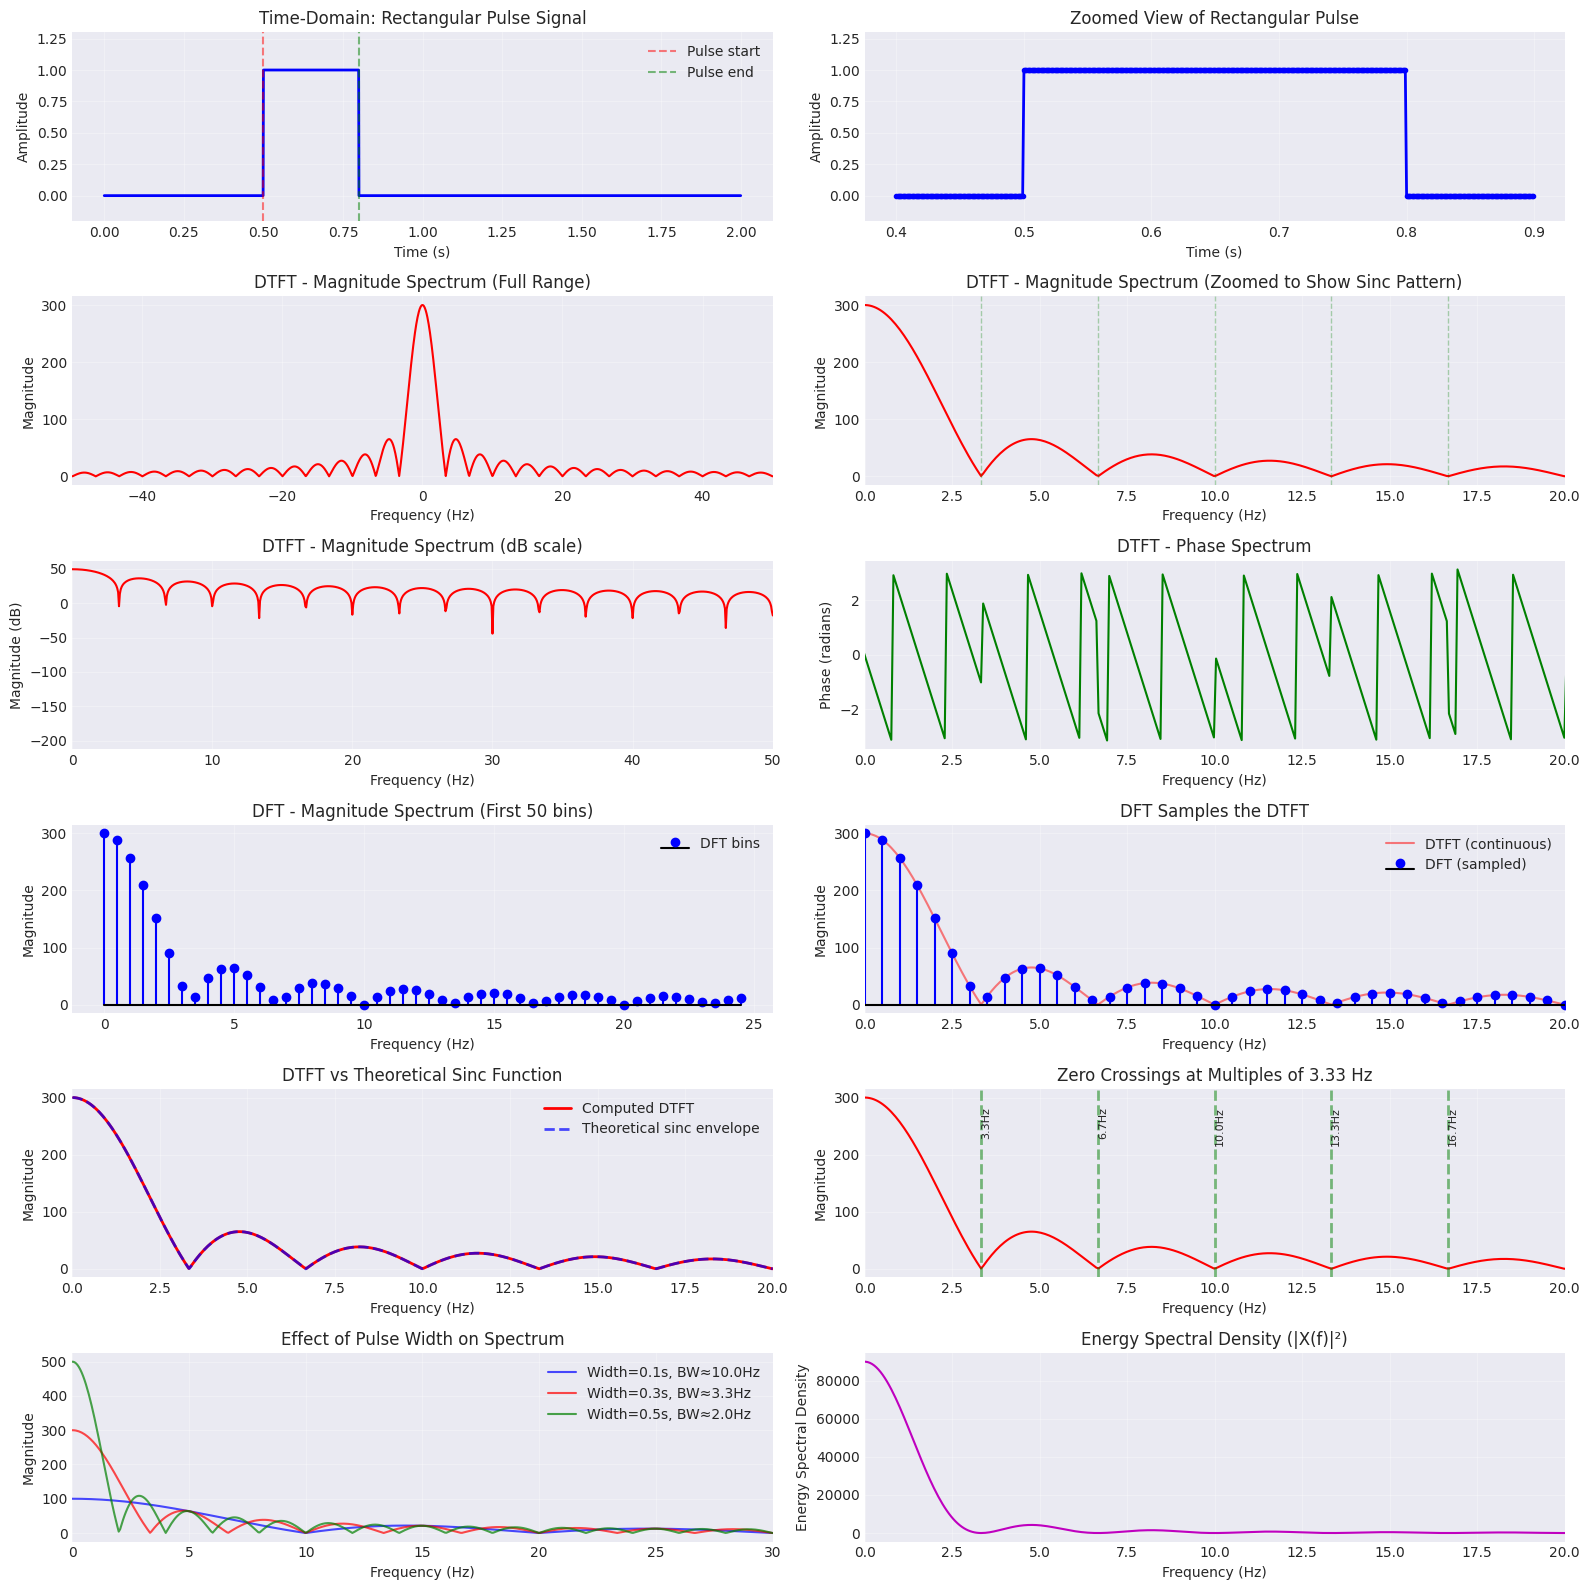

RECTANGULAR PULSE SIGNAL ANALYSIS
Sampling frequency: 1000 Hz
Total duration: 2 s
Number of samples: 2000
Pulse start time: 0.5 s
Pulse width: 0.3 s
Pulse amplitude: 1.0
Number of samples in pulse: 300
DFT frequency resolution: 0.5000 Hz

(e) TIME-DOMAIN vs FREQUENCY-DOMAIN RELATIONSHIP ANALYSIS

1. SINC FUNCTION SPECTRUM:
------------------------------------------------------------------------------------------
   • Rectangular pulse in time → Sinc function in frequency
   • Main lobe bandwidth: 3.333 Hz
   • Mathematical form: X(f) = A·T·sinc(πfT)·e^(-jπfT)
   • Where T = pulse width = 0.3 s
   • Sinc(x) = sin(πx)/(πx)

2. ZERO CROSSINGS:
------------------------------------------------------------------------------------------
   • First zero crossing at: 3.333 Hz
   • Zero crossings occur at: f = n/T, where n = 1, 2, 3, ...
   • Theoretical zero frequencies:
     - Zero 1: 3.333 Hz
     - Zero 2: 6.667 Hz
     - Zero 3: 10.000 Hz
     - Zero 4: 13.333 Hz
     - Zero 5: 16.667 Hz

3

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a rectangular pulse signal
fs = 1000  # Sampling frequency in Hz
duration = 2  # Total duration in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Rectangular pulse parameters
pulse_start = 0.5  # Pulse starts at 0.5 seconds
pulse_width = 0.3  # Pulse width in seconds
pulse_amplitude = 1.0  # Pulse amplitude

# Generate rectangular pulse
x = np.zeros_like(t)
pulse_start_idx = int(pulse_start * fs)
pulse_end_idx = int((pulse_start + pulse_width) * fs)
x[pulse_start_idx:pulse_end_idx] = pulse_amplitude

# (b) Plot the time-domain waveform
plt.figure(figsize=(16, 16))

plt.subplot(6, 2, 1)
plt.plot(t, x, 'b-', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain: Rectangular Pulse Signal')
plt.grid(True, alpha=0.3)
plt.ylim([-0.2, 1.3])
# Add annotations
plt.axvline(x=pulse_start, color='r', linestyle='--', alpha=0.5, label='Pulse start')
plt.axvline(x=pulse_start + pulse_width, color='g', linestyle='--', alpha=0.5, label='Pulse end')
plt.legend()

plt.subplot(6, 2, 2)
zoom_start = pulse_start - 0.1
zoom_end = pulse_start + pulse_width + 0.1
zoom_idx_start = int(zoom_start * fs)
zoom_idx_end = int(zoom_end * fs)
plt.plot(t[zoom_idx_start:zoom_idx_end], x[zoom_idx_start:zoom_idx_end], 'b-', linewidth=2, marker='o', markersize=3)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed View of Rectangular Pulse')
plt.grid(True, alpha=0.3)
plt.ylim([-0.2, 1.3])

# (c) Compute and plot DTFT (continuous frequency spectrum)
N_dtft = 16384  # Number of frequency points for smooth DTFT
w = np.linspace(-np.pi, np.pi, N_dtft)  # Normalized frequency from -π to π
f_dtft = w * fs / (2 * np.pi)  # Convert to Hz

# Compute DTFT
n = np.arange(len(x))
X_dtft = np.zeros(N_dtft, dtype=complex)
for k in range(N_dtft):
    X_dtft[k] = np.sum(x * np.exp(-1j * w[k] * n))

# Plot DTFT magnitude spectrum
plt.subplot(6, 2, 3)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT - Magnitude Spectrum (Full Range)')
plt.xlim([-50, 50])
plt.grid(True, alpha=0.3)

plt.subplot(6, 2, 4)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT - Magnitude Spectrum (Zoomed to Show Sinc Pattern)')
plt.xlim([0, 20])
# Mark the first few zeros
first_zero = 1 / pulse_width
for i in range(1, 6):
    plt.axvline(x=i*first_zero, color='g', linestyle='--', alpha=0.3, linewidth=1)
plt.grid(True, alpha=0.3)

# Plot DTFT magnitude in dB scale
plt.subplot(6, 2, 5)
X_dtft_db = 20 * np.log10(np.abs(X_dtft) + 1e-10)  # Add small value to avoid log(0)
plt.plot(f_dtft, X_dtft_db, 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('DTFT - Magnitude Spectrum (dB scale)')
plt.xlim([0, 50])
plt.grid(True, alpha=0.3)

# Plot DTFT phase spectrum
plt.subplot(6, 2, 6)
plt.plot(f_dtft, np.angle(X_dtft), 'g-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('DTFT - Phase Spectrum')
plt.xlim([0, 20])
plt.grid(True, alpha=0.3)

# (d) Compute and plot DFT (discrete frequency spectrum)
N_dft = len(x)  # Number of samples
X_dft = np.fft.fft(x)  # Compute DFT using FFT algorithm
f_dft = np.fft.fftfreq(N_dft, 1/fs)  # Frequency bins

# Plot DFT magnitude spectrum
plt.subplot(6, 2, 7)
positive_freq_idx = f_dft >= 0
plt.stem(f_dft[positive_freq_idx][:50], np.abs(X_dft[positive_freq_idx][:50]), 
         linefmt='b-', markerfmt='bo', basefmt='k-', label='DFT bins')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT - Magnitude Spectrum (First 50 bins)')
plt.legend()
plt.grid(True, alpha=0.3)

# Overlay DTFT on DFT to show sampling
plt.subplot(6, 2, 8)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5, alpha=0.5, label='DTFT (continuous)')
plt.stem(f_dft[positive_freq_idx][:50], np.abs(X_dft[positive_freq_idx][:50]), 
         linefmt='b-', markerfmt='bo', basefmt='k-', label='DFT (sampled)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Samples the DTFT')
plt.xlim([0, 20])
plt.legend()
plt.grid(True, alpha=0.3)

# (e) Analysis - Sinc function characteristics
plt.subplot(6, 2, 9)
# Theoretical sinc function for comparison
# For a rectangular pulse: DTFT ≈ A·T·sinc(f·T) where T is pulse width
f_theory = np.linspace(0, 20, 1000)
# Sinc function centered at DC, accounting for delay
T = pulse_width
A = pulse_amplitude
theoretical_sinc = A * T * fs * np.abs(np.sinc(f_theory * T))

plt.plot(f_dtft[f_dtft >= 0], np.abs(X_dtft[f_dtft >= 0]), 'r-', linewidth=2, label='Computed DTFT')
plt.plot(f_theory, theoretical_sinc, 'b--', linewidth=2, alpha=0.7, label='Theoretical sinc envelope')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DTFT vs Theoretical Sinc Function')
plt.xlim([0, 20])
plt.legend()
plt.grid(True, alpha=0.3)

# Zero crossings analysis
plt.subplot(6, 2, 10)
plt.plot(f_dtft, np.abs(X_dtft), 'r-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'Zero Crossings at Multiples of {1/pulse_width:.2f} Hz')
plt.xlim([0, 20])
# Mark theoretical zero crossings
for i in range(1, 6):
    zero_freq = i / pulse_width
    plt.axvline(x=zero_freq, color='g', linestyle='--', alpha=0.5, linewidth=2)
    plt.text(zero_freq, plt.ylim()[1]*0.9, f'{zero_freq:.1f}Hz', 
             rotation=90, verticalalignment='top', fontsize=8)
plt.grid(True, alpha=0.3)

# Time-frequency localization
plt.subplot(6, 2, 11)
# Show how pulse width affects main lobe width
pulse_widths = [0.1, 0.3, 0.5]
colors = ['b', 'r', 'g']
for pw, color in zip(pulse_widths, colors):
    x_temp = np.zeros_like(t)
    pw_samples = int(pw * fs)
    x_temp[pulse_start_idx:pulse_start_idx + pw_samples] = pulse_amplitude
    
    X_temp = np.zeros(N_dtft, dtype=complex)
    for k in range(N_dtft):
        X_temp[k] = np.sum(x_temp * np.exp(-1j * w[k] * n))
    
    plt.plot(f_dtft, np.abs(X_temp), color=color, linewidth=1.5, 
             label=f'Width={pw}s, BW≈{1/pw:.1f}Hz', alpha=0.7)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Effect of Pulse Width on Spectrum')
plt.xlim([0, 30])
plt.legend()
plt.grid(True, alpha=0.3)

# Energy spectral density
plt.subplot(6, 2, 12)
energy_spectrum = np.abs(X_dtft)**2
plt.plot(f_dtft, energy_spectrum, 'm-', linewidth=1.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy Spectral Density')
plt.title('Energy Spectral Density (|X(f)|²)')
plt.xlim([0, 20])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("=" * 90)
print("RECTANGULAR PULSE SIGNAL ANALYSIS")
print("=" * 90)
print(f"Sampling frequency: {fs} Hz")
print(f"Total duration: {duration} s")
print(f"Number of samples: {len(x)}")
print(f"Pulse start time: {pulse_start} s")
print(f"Pulse width: {pulse_width} s")
print(f"Pulse amplitude: {pulse_amplitude}")
print(f"Number of samples in pulse: {pulse_end_idx - pulse_start_idx}")
print(f"DFT frequency resolution: {fs/N_dft:.4f} Hz")
print("=" * 90)

print("\n" + "=" * 90)
print("(e) TIME-DOMAIN vs FREQUENCY-DOMAIN RELATIONSHIP ANALYSIS")
print("=" * 90)

print("\n1. SINC FUNCTION SPECTRUM:")
print("-" * 90)
main_lobe_bw = 1 / pulse_width
print(f"   • Rectangular pulse in time → Sinc function in frequency")
print(f"   • Main lobe bandwidth: {main_lobe_bw:.3f} Hz")
print(f"   • Mathematical form: X(f) = A·T·sinc(πfT)·e^(-jπfT)")
print(f"   • Where T = pulse width = {pulse_width} s")
print(f"   • Sinc(x) = sin(πx)/(πx)")

print("\n2. ZERO CROSSINGS:")
print("-" * 90)
print(f"   • First zero crossing at: {1/pulse_width:.3f} Hz")
print(f"   • Zero crossings occur at: f = n/T, where n = 1, 2, 3, ...")
print(f"   • Theoretical zero frequencies:")
for i in range(1, 6):
    print(f"     - Zero {i}: {i/pulse_width:.3f} Hz")

print("\n3. MAIN LOBE vs SIDE LOBES:")
print("-" * 90)
# Find main lobe and first side lobe magnitudes
pos_idx = f_dtft >= 0
f_pos = f_dtft[pos_idx]
X_pos = np.abs(X_dtft[pos_idx])

main_lobe_mag = X_pos[0]  # DC component is maximum
first_zero_idx = np.argmin(np.abs(f_pos - (1/pulse_width)))
# Find first side lobe (between first and second zero)
second_zero_idx = np.argmin(np.abs(f_pos - (2/pulse_width)))
side_lobe_region = X_pos[first_zero_idx:second_zero_idx]
if len(side_lobe_region) > 0:
    first_sidelobe_mag = np.max(side_lobe_region)
    sidelobe_ratio_db = 20 * np.log10(first_sidelobe_mag / main_lobe_mag)
    print(f"   • Main lobe magnitude: {main_lobe_mag:.2f}")
    print(f"   • First side lobe magnitude: {first_sidelobe_mag:.2f}")
    print(f"   • Side lobe ratio: {sidelobe_ratio_db:.2f} dB")
    print(f"   • Theoretical ratio: -13.46 dB")

print("\n4. TIME-FREQUENCY DUALITY:")
print("-" * 90)
print(f"   • Pulse width (time): {pulse_width} s")
print(f"   • Main lobe width (frequency): {main_lobe_bw:.3f} Hz")
print(f"   • Time-Bandwidth product: {pulse_width * main_lobe_bw:.3f}")
print(f"   • Relationship: ΔT · Δf ≈ 1")
print(f"   • Narrower pulse → Wider spectrum")
print(f"   • Wider pulse → Narrower spectrum")

print("\n5. DISCONTINUITIES AND HIGH FREQUENCIES:")
print("-" * 90)
# Calculate high frequency energy
high_freq_threshold = 10  # Hz
high_freq_idx = f_pos > high_freq_threshold
high_freq_energy = np.sum(np.abs(X_dtft[pos_idx][high_freq_idx])**2)
total_energy = np.sum(np.abs(X_dtft[pos_idx])**2)
high_freq_percentage = (high_freq_energy / total_energy) * 100

print(f"   • Sharp edges (discontinuities) require high frequencies")
print(f"   • Energy above {high_freq_threshold} Hz: {high_freq_percentage:.2f}%")
print(f"   • Perfect reconstruction needs infinite bandwidth")
print(f"   • Gibbs phenomenon appears with band-limited reconstruction")

print("\n6. ENERGY DISTRIBUTION:")
print("-" * 90)
time_energy = np.sum(x**2)
freq_energy = np.sum(np.abs(X_dft)**2) / N_dft
main_lobe_energy_idx = f_pos < main_lobe_bw
main_lobe_energy = np.sum(np.abs(X_dtft[pos_idx][main_lobe_energy_idx])**2)
main_lobe_energy_percentage = (main_lobe_energy / total_energy) * 100 / 2  # Divide by 2 for positive freq only

print(f"   • Total energy (time domain): {time_energy:.4f}")
print(f"   • Total energy (frequency domain): {freq_energy:.4f}")
print(f"   • Parseval's theorem verified: {np.isclose(time_energy, freq_energy)}")
print(f"   • Energy in main lobe: ~{main_lobe_energy_percentage:.1f}%")
print(f"   • Most energy concentrated in main lobe")

print("\n7. SPECTRAL LEAKAGE:")
print("-" * 90)
print(f"   • Finite duration signal → Spectral leakage")
print(f"   • Energy spreads to adjacent frequencies")
print(f"   • Side lobes represent this leakage")
print(f"   • Windowing can reduce (but not eliminate) side lobes")
print(f"   • Trade-off: Lower side lobes ↔ Wider main lobe")

print("\n8. PRACTICAL IMPLICATIONS:")
print("-" * 90)
print(f"   • Digital communications: Pulse shaping for bandwidth control")
print(f"   • Radar/Sonar: Pulse width determines range resolution")
print(f"   • Signal processing: Rectangular window has poor frequency selectivity")
print(f"   • Data transmission: Bandwidth requirement = 1/T minimum")
print(f"   • Time-limited signals cannot be band-limited (and vice versa)")

print("\n9. DFT SAMPLING RELATIONSHIP:")
print("-" * 90)
print(f"   • DFT samples the continuous DTFT at N equally-spaced points")
print(f"   • Sampling interval (freq): {fs/N_dft:.4f} Hz")
print(f"   • Fine frequency details visible in DTFT may be missed by DFT")
print(f"   • Zero-padding increases DFT resolution (more samples of DTFT)")
print(f"   • But doesn't add new information!")

print("\n10. KEY INSIGHTS:")
print("-" * 90)
print(f"   ✓ Rectangular window → Sinc spectrum (many side lobes)")
print(f"   ✓ Sharp transitions → Broad frequency content")
print(f"   ✓ Time localization → Frequency spreading")
print(f"   ✓ Pulse width inversely proportional to bandwidth")
print(f"   ✓ Zero crossings at integer multiples of 1/T")
print(f"   ✓ Perfect rectangular pulse needs infinite bandwidth")
print(f"   ✓ Band-limited signals cannot be perfectly time-limited")

print("\n11. COMPARISON WITH OTHER PULSE SHAPES:")
print("-" * 90)
print(f"   • Rectangular: Simplest, worst frequency response")
print(f"   • Gaussian: Gaussian spectrum, no side lobes")
print(f"   • Raised cosine: Controlled spectral roll-off")
print(f"   • Root raised cosine: Zero ISI, matched filtering")

print("=" * 90)